# Homework: Sonar signal classification
In this workshop you will train a binary classification neural network to differentiate if sonar signals bounced against a metal cylinder or a rock.

[Info of the data](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks))

Goal: Get an accuracy higher than 0.80 in the validation set

## Get the data from Google Drive

In [1]:
# Import libraries to interact with Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
# Authenticate with your Google account to get access to the data
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# Download data
download = drive.CreateFile({'id': '1rw5l3jCo2vlNc8NLrMk3KPZr6HsjNRCY'})
download.GetContentFile('sonar.csv')

In [4]:
ls

sample_data/  sonar.csv


## Do some magic below! ;)

In [5]:
import pandas as pd
data = pd.read_csv('sonar.csv')

In [6]:
print(data.shape)
data.head()

(207, 61)


,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [8]:
# valdiando etiquetas a predecir:
data['R'].unique()

array(['R', 'M'], dtype=object)

Validando rangos de las columnas:

In [9]:
# Calculating the minimum and maximum values for each feature to examine the range of values
range_stats = data.describe().loc[['min', 'max']]

# Display the range statistics
range_stats


,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
min,0.0015,0.0006,0.0015,0.0058,0.0067,0.0102,0.0033,0.0055,0.0075,0.0113,...,0.0000,0.0008,0.0005,0.0010,0.0006,0.0004,0.0003,0.0003,0.0001,0.0006
max,0.1371,0.2339,0.3059,0.4264,0.4010,0.3823,0.3729,0.4590,0.6828,0.7106,...,0.1004,0.0709,0.0390,0.0352,0.0447,0.0394,0.0355,0.0440,0.0364,0.0439


In [10]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the features (excluding the last column which contains the labels)
features = data.iloc[:, :-1]
scaled_features = scaler.fit_transform(features)

# Create a new dataframe for the scaled features
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)

# Display the first few rows of the scaled data to verify the scaling
scaled_data.head()


,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
0,0.700189,0.420421,1.052950,0.319501,0.777810,2.600518,1.522475,2.506911,1.324632,0.587392,...,-0.294569,-0.528057,-0.259343,-0.838780,0.014044,1.913786,1.084838,-0.470938,-0.442688,-0.422461
1,-0.130894,0.599427,1.719130,1.167351,0.401466,2.087862,1.967839,2.847551,3.240336,3.058831,...,-1.061350,1.012809,0.832198,-0.194293,1.227682,2.842696,4.150049,1.306561,0.252998,0.254053
2,-0.835792,-0.647546,0.480451,-0.722021,-0.983262,-1.147115,-0.190961,-0.083126,-0.996071,-0.608898,...,0.672242,-0.142840,-1.010664,0.559893,-0.112965,-0.154353,-0.482599,-0.548221,-0.636834,1.030055
3,2.044717,0.854283,0.110929,-0.315311,-0.289998,-0.671681,-0.011196,1.315846,1.516965,1.768058,...,-0.036197,-1.079853,-0.755498,-0.057168,0.239837,-1.170895,-0.099448,-0.486395,0.447143,0.572413
4,-0.026465,0.208041,-0.419933,-0.788730,-0.660939,-0.094732,-0.024152,0.571138,0.280782,0.711633,...,-0.469595,-0.934096,-1.322533,-0.975905,-1.129034,0.126073,-0.360687,-0.810982,-0.458867,-0.064306


In [11]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Paso 1: Preparar los datos
X = scaled_data.values
y = data.iloc[:, -1].values

In [27]:
# Codificar las etiquetas
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42)

# Paso 2: Construir el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(70, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.6),  # Aplicar un Dropout del 50%
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dropout(0.65),  # Aplicar un Dropout del 50%
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [28]:
# Configuración de Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True
)


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [29]:

history = model.fit(X_train, y_train, epochs=100, batch_size=20,
                    validation_data=(X_test, y_test), verbose=1,
                    callbacks=[early_stopping_monitor])

#Evaluación
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy:.4f}")

Epoch 1/100
8/8 [==============================] - 1s 32ms/step - loss: 0.8424 - accuracy: 0.5484 - val_loss: 0.5713 - val_accuracy: 0.7500
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.8075 - accuracy: 0.5806 - val_loss: 0.5632 - val_accuracy: 0.7308
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 0.7615 - accuracy: 0.5935 - val_loss: 0.5575 - val_accuracy: 0.7500
Epoch 4/100
8/8 [==============================] - 0s 10ms/step - loss: 0.7151 - accuracy: 0.6323 - val_loss: 0.5517 - val_accuracy: 0.7500
Epoch 5/100
8/8 [==============================] - 0s 11ms/step - loss: 0.7174 - accuracy: 0.6323 - val_loss: 0.5455 - val_accuracy: 0.7500
Epoch 6/100
8/8 [==============================] - 0s 12ms/step - loss: 0.6438 - accuracy: 0.6452 - val_loss: 0.5375 - val_accuracy: 0.7692
Epoch 7/100
8/8 [==============================] - 0s 12ms/step - loss: 0.7167 - accuracy: 0.5871 - val_loss: 0.5259 - val_accuracy: 0.7692
Epoch 8/100
8/8 [====

Mejor Epoch:
16/16 [==============================] - 0s 9ms/step - loss: 0.2505 - accuracy: 0.8839 - val_loss: 0.5252 - val_accuracy: 0.8269

### Ahora pasamos conjunto de TEST:

In [30]:
### Ahora pasamos conjunto de TEST:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


2/2 - 0s - loss: 0.4462 - accuracy: 0.8077 - 25ms/epoch - 12ms/step
Test Loss: 0.4461715519428253
Test Accuracy: 0.807692289352417


In [31]:
predictions = model.predict(X_test)
# Si tu última capa es una sigmoid, las predicciones estarán en el rango de [0, 1]
# Puedes convertirlas a etiquetas de clase binaria 0 o 1 usando un umbral, comúnmente 0.5
predicted_classes = (predictions > 0.5).astype(int)


2/2 [==============================] - 0s 4ms/step


In [34]:
from sklearn.metrics import confusion_matrix, classification_report

# Matriz de confusión
cm = confusion_matrix(y_test, predicted_classes)
print(cm)

# Informe de clasificación
cr = classification_report(y_test, predicted_classes)
print(cr)


[[25  6]
 [ 4 17]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        31
           1       0.74      0.81      0.77        21

    accuracy                           0.81        52
   macro avg       0.80      0.81      0.80        52
weighted avg       0.81      0.81      0.81        52



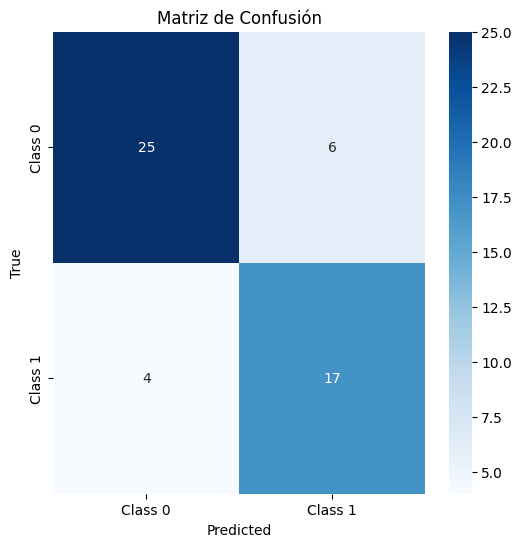

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión')
plt.show()
